In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from experiments.causal_trace import plot_trace_heatmap

In [2]:
query_file = "/mimer/NOBACKUP/groups/dsaynova/ROME/rome/data/P19_gpt2_xl_preds.jsonl"
results_folder = "/mimer/NOBACKUP/groups/dsaynova/ROME/rome/data/results/gpt2-xl/causal_trace_pararel_1583610/cases/"

In [17]:
queries = []
with open(query_file) as f:
    for line in f:
        queries.append(json.loads(line))

#partial results
queries_sample = queries[:314]        
for i in queries_sample:
    results = np.load(results_folder+str(i['known_id'])+"_gold.npz", allow_pickle=True)
    i['gold_low'] = results['low_score']
    i['TE_gold'] = i['gold_p'] - i['gold_low']
    
    results_c = np.load(results_folder+str(i['known_id'])+"_candidate.npz", allow_pickle=True)
    i['candidate_low'] = results_c['low_score']
    i['TE_candidate'] = i['candidate_p'] - i['candidate_low']
    
    results_a = np.load(results_folder+str(i['known_id'])+"_any.npz", allow_pickle=True)
    i['any_low'] = results_c['low_score']
    i['TE_any'] = i['prediction_p'] - i['any_low']
    
    i['correct'] = 1 if i['gold_rank'] <= i['candidate_rank'] else 0
    
queries_sample[0]

{'subject': 'Allan Peiper',
 'attribute': 'Alexandra',
 'template': '{} was born in',
 'prediction': ' the',
 'prompt': 'Allan Peiper was born in',
 'relation_id': 'P19',
 'known_id': 0,
 'prediction_p': 0.37090078,
 'candidate_prediction': ' Chicago',
 'candidate_p': 0.00176685,
 'candidate_rank': 39,
 'gold_rank': 20169,
 'gold_p': 1.4e-07,
 'gold_low': array(9.6376998e-06),
 'TE_gold': -9.4976998044434e-06,
 'candidate_low': array(0.00377229),
 'TE_candidate': -0.0020054446144640446,
 'any_low': array(0.00377229),
 'TE_any': 0.36712848538553594,
 'correct': 0}

In [18]:
queries_sample_pd = pd.DataFrame(queries_sample)

<AxesSubplot:xlabel='candidate_rank', ylabel='TE_candidate'>

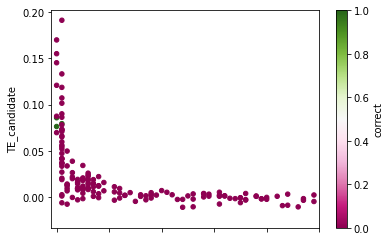

In [19]:
queries_sample_pd.plot.scatter(x='candidate_rank', y='TE_candidate', c = 'correct', colormap='PiYG', xlim=(-1,50))

<AxesSubplot:xlabel='gold_rank', ylabel='TE_gold'>

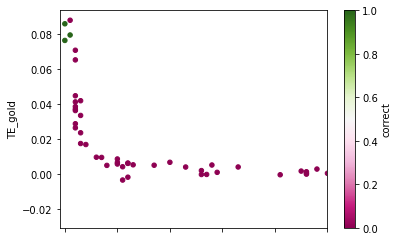

In [20]:
queries_sample_pd.plot.scatter(x='gold_rank', y='TE_gold', c = 'correct', colormap='PiYG', xlim=(-1,50))

<AxesSubplot:xlabel='gold_rank', ylabel='TE_any'>

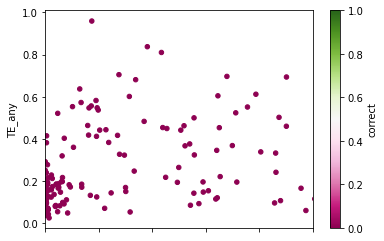

In [21]:
queries_sample_pd.plot.scatter(x='gold_rank', y='TE_any', c = 'correct', colormap='PiYG', xlim=(-1,5000))